In [139]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import SelectKBest,f_regression,VarianceThreshold,SelectKBest
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [6]:
data_paths=glob.glob(r"C:\Users\NTCUONG\notebook\training_LR\training*.csv")
data_paths

['C:\\Users\\NTCUONG\\notebook\\training_LR\\training1.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training10.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training11.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training12.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training2.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training3.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training4.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training5.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training6.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training7.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training8.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training9.csv']

In [89]:
base_df=pd.read_csv(r'C:\\Users\\NTCUONG\\notebook\\training_LR\\training1.csv')
base_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,20,3,70.0,8400,1,3,3,0,4,0,...,0,0,0,0,6,2010,8,4,53,145000
1,60,3,59.0,7837,1,0,3,0,4,0,...,0,0,0,0,5,2009,8,4,16,178000
2,30,3,67.0,8777,1,3,3,0,4,0,...,0,0,0,0,5,2008,8,4,98,85000
3,50,3,60.0,7200,1,3,3,0,0,0,...,0,0,0,0,6,2007,8,4,70,175000
4,50,3,50.0,5000,1,3,3,0,4,0,...,0,0,0,0,5,2010,8,4,86,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,30,4,50.0,5925,1,3,0,0,4,0,...,0,0,0,0,3,2007,8,2,70,89471
1456,20,3,124.0,16158,1,0,2,0,4,1,...,0,0,0,0,6,2009,8,4,4,260000
1457,60,3,63.0,8199,1,3,3,0,4,0,...,0,0,0,0,10,2008,8,4,3,189000
1458,70,3,60.0,9084,1,3,3,0,4,0,...,0,0,0,0,10,2009,8,4,69,108000


In [135]:
statistic=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\statistic_training_dataset.csv")
statistic

,DATASET,ENCODER,IMPUTER,NORMALIZER,TRAINING_ROWS,TESTING_ROWS
0,training1.csv,LabelEncoder,simpleimputer,none,1168,292
1,training2.csv,LabelEncoder,simpleimputer,normalizer,1168,292
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler,1168,292
3,training4.csv,LabelEncoder,knnimputer,none,1168,292
4,training5.csv,LabelEncoder,knnimputer,normalizer,1168,292
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler,1168,292
6,training7.csv,OnehotEncoder,simpleimputer,none,1168,292
7,training8.csv,OnehotEncoder,simpleimputer,normalizer,1168,292
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler,1168,292
9,training10.csv,OnehotEncoder,knnimputer,none,1168,292


In [136]:
statistic["DATASET"]=statistic["DATASET"].apply(lambda x:x[:-4])
statistic

,DATASET,ENCODER,IMPUTER,NORMALIZER,TRAINING_ROWS,TESTING_ROWS
0,training1,LabelEncoder,simpleimputer,none,1168,292
1,training2,LabelEncoder,simpleimputer,normalizer,1168,292
2,training3,LabelEncoder,simpleimputer,minmaxscaler,1168,292
3,training4,LabelEncoder,knnimputer,none,1168,292
4,training5,LabelEncoder,knnimputer,normalizer,1168,292
5,training6,LabelEncoder,knnimputer,minmaxscaler,1168,292
6,training7,OnehotEncoder,simpleimputer,none,1168,292
7,training8,OnehotEncoder,simpleimputer,normalizer,1168,292
8,training9,OnehotEncoder,simpleimputer,minmaxscaler,1168,292
9,training10,OnehotEncoder,knnimputer,none,1168,292


In [51]:
statistic=statistic.iloc[:,:-2]
statistic

,DATASET,ENCODER,IMPUTER,NORMALIZER
0,training1.csv,LabelEncoder,simpleimputer,none
1,training2.csv,LabelEncoder,simpleimputer,normalizer
2,training3.csv,LabelEncoder,simpleimputer,minmaxscaler
3,training4.csv,LabelEncoder,knnimputer,none
4,training5.csv,LabelEncoder,knnimputer,normalizer
5,training6.csv,LabelEncoder,knnimputer,minmaxscaler
6,training7.csv,OnehotEncoder,simpleimputer,none
7,training8.csv,OnehotEncoder,simpleimputer,normalizer
8,training9.csv,OnehotEncoder,simpleimputer,minmaxscaler
9,training10.csv,OnehotEncoder,knnimputer,none


In [113]:
def create_df(df,col_list):
    df_fs=df[col_list]
    # for col in col_list:
        # df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [115]:
split_row=1168
def eval(df_fs,model):
    X_train,X_test,y_train,y_test=df_fs.iloc[:split_row,:-1], df_fs.iloc[split_row:,:-1], df_fs.iloc[:split_row,-1], df_fs.iloc[split_row:,-1]
    model.fit(X_train,y_train)
    y_pre_testing=model.predict(X_test)
    y_pre_training=model.predict(X_train)
    mae_training=mean_absolute_error(y_train,y_pre_training)
    r2_training=r2_score(y_train,y_pre_training)
    mae_testing=mean_absolute_error(y_test,y_pre_testing)
    r2_testing=r2_score(y_test,y_pre_testing)
    return mae_training,r2_training,mae_testing,r2_testing

In [22]:
def variance(df,threshold):
    varr_thresh=VarianceThreshold(threshold=threshold)
    varr_thresh.fit_transform(df)
    selected_columns = df.columns[varr_thresh.get_support()]
    return selected_columns

In [29]:
def UFS(df,number_feature):
    fs=SelectKBest(f_regression,k=number_feature)
    fs.fit(df.iloc[:,:-1],df.iloc[:,-1])
    selected_columns=fs.get_feature_names_out()
    return selected_columns

In [67]:
def extract_string(s):
    start = s.find('R\\')+2
    end = s.find('.', start)  
    if start == 0 or end == -1:  
        return None
    return s[start:end]  

In [121]:
overview={
    "DATASET":[],
    "MODEL":[],
    "NOF":[],
    "THRESHOLD":[],
    "FEATURE_SELECTION":[],
    "CRITERION":[],
    "SPLITER":[],
    "MAX_DEPTH":[],
    "R2_TRAINING":[],
    "R2_TESTING":[],
    "MAE_TRAINING":[],
    "MAE_TESTING":[]
}


In [119]:
def update_overview(nof,threshold):
    overview["DATASET"].append(s)
    overview["MODEL"].append("DECISIONTREE")
    overview["NOF"].append(nof)
    overview["THRESHOLD"].append(threshold)
    overview["FEATURE_SELECTION"].append(method)
    overview["CRITERION"].append(param1)
    overview["SPLITER"].append(param2)
    overview["MAX_DEPTH"].append(param3)
    overview["R2_TRAINING"].append(r2_training)
    overview["R2_TESTING"].append(r2_testing)
    overview["MAE_TRAINING"].append(mae_training)
    overview["MAE_TESTING"].append(mae_testing)

In [125]:
param1_lst=["squared_error", "friedman_mse"]
param2_lst=["best", "random"]
param3_lst=[20, 30,50]

In [97]:
overview

{'DATASET': [],
 'MODEL': [],
 'NOF': [],
 'FEATURE_SELECTION': [],
 'CRITERION': [],
 'SPLITER': [],
 'MAX_DEPTH': [],
 'R2_TRAINING': [],
 'R2_TESTING': [],
 'MAE_TRAINING': [],
 'MAE_TESTING': []}

In [131]:
Fs_method=["UFS","VarianceThreshold"]
for path in data_paths:
    df=pd.read_csv(path)
    s=extract_string(path)
    print("Processing for {} ...".format(s))
    for param1 in param1_lst:
        for param2 in param2_lst:
            for param3 in param3_lst:
                model=DecisionTreeRegressor(criterion=param1,splitter=param2,max_depth=param3)
                for method in Fs_method:
                    if method=="UFS":
                        for nof in range(5,75,10):
                            columns=UFS(df,nof)
                            columns=list(columns)+["SalePrice"]
                            fs_df=create_df(df,columns)
                            mae_training,r2_training,mae_testing,r2_testing=eval(fs_df,model)
                            update_overview(nof,-1)
                    else:
                        for i in range(5,21,5):
                            if i/1000000==0.80660:
                                columns=variance(df,i/1000000)
                                columns=list(columns)+["SalePrice"]
                                fs_df=create_df(df,columns)
                                mae_training,r2_training,mae_testing,r2_testing=eval(fs_df,model)
                                update_overview(-1,i/1000000)
                                
    

Processing for training1 ...
Processing for training10 ...
Processing for training11 ...
Processing for training12 ...
Processing for training2 ...
Processing for training3 ...
Processing for training4 ...
Processing for training5 ...
Processing for training6 ...
Processing for training7 ...
Processing for training8 ...
Processing for training9 ...


In [134]:
overview_df=pd.DataFrame(overview)
overview_df

,DATASET,MODEL,NOF,THRESHOLD,FEATURE_SELECTION,CRITERION,SPLITER,MAX_DEPTH,R2_TRAINING,R2_TESTING,MAE_TRAINING,MAE_TESTING
0,training1,DECISIONTREE,5,-1.000000,UFS,squared_error,best,20,0.999626,0.782541,2.461025e+02,27185.234018
1,training1,DECISIONTREE,15,-1.000000,UFS,squared_error,best,20,0.999762,0.817506,1.585668e+02,24506.418950
2,training1,DECISIONTREE,25,-1.000000,UFS,squared_error,best,20,0.999936,0.791013,6.669113e+01,26264.092466
3,training1,DECISIONTREE,35,-1.000000,UFS,squared_error,best,20,0.999970,0.764828,5.220911e+01,27630.868803
4,training1,DECISIONTREE,45,-1.000000,UFS,squared_error,best,20,0.999979,0.787939,3.772464e+01,26685.030985
...,...,...,...,...,...,...,...,...,...,...,...,...
87909,training9,DECISIONTREE,65,-1.000000,UFS,friedman_mse,random,50,1.000000,0.810233,0.000000e+00,0.037203
87910,training9,DECISIONTREE,-1,0.000005,VarianceThreshold,friedman_mse,random,50,1.000000,0.967872,1.176285e-18,0.004599
87911,training9,DECISIONTREE,-1,0.000010,VarianceThreshold,friedman_mse,random,50,1.000000,0.968912,2.198109e-18,0.004187
87912,training9,DECISIONTREE,-1,0.000015,VarianceThreshold,friedman_mse,random,50,1.000000,0.988630,3.968477e-18,0.002334


In [137]:
overview_df=pd.merge(statistic,overview_df,on="DATASET")
overview_df

,DATASET,ENCODER,IMPUTER,NORMALIZER,TRAINING_ROWS,TESTING_ROWS,MODEL,NOF,THRESHOLD,FEATURE_SELECTION,CRITERION,SPLITER,MAX_DEPTH,R2_TRAINING,R2_TESTING,MAE_TRAINING,MAE_TESTING
0,training1,LabelEncoder,simpleimputer,none,1168,292,DECISIONTREE,5,-1.000000,UFS,squared_error,best,20,0.999626,0.782541,2.461025e+02,27185.234018
1,training1,LabelEncoder,simpleimputer,none,1168,292,DECISIONTREE,15,-1.000000,UFS,squared_error,best,20,0.999762,0.817506,1.585668e+02,24506.418950
2,training1,LabelEncoder,simpleimputer,none,1168,292,DECISIONTREE,25,-1.000000,UFS,squared_error,best,20,0.999936,0.791013,6.669113e+01,26264.092466
3,training1,LabelEncoder,simpleimputer,none,1168,292,DECISIONTREE,35,-1.000000,UFS,squared_error,best,20,0.999970,0.764828,5.220911e+01,27630.868803
4,training1,LabelEncoder,simpleimputer,none,1168,292,DECISIONTREE,45,-1.000000,UFS,squared_error,best,20,0.999979,0.787939,3.772464e+01,26685.030985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87909,training12,OnehotEncoder,knnimputer,minmaxscaler,1168,292,DECISIONTREE,65,-1.000000,UFS,friedman_mse,random,50,1.000000,0.760569,0.000000e+00,0.037313
87910,training12,OnehotEncoder,knnimputer,minmaxscaler,1168,292,DECISIONTREE,-1,0.000005,VarianceThreshold,friedman_mse,random,50,1.000000,0.978352,6.534917e-19,0.005806
87911,training12,OnehotEncoder,knnimputer,minmaxscaler,1168,292,DECISIONTREE,-1,0.000010,VarianceThreshold,friedman_mse,random,50,1.000000,0.987617,1.734723e-18,0.003884
87912,training12,OnehotEncoder,knnimputer,minmaxscaler,1168,292,DECISIONTREE,-1,0.000015,VarianceThreshold,friedman_mse,random,50,1.000000,0.996992,3.885305e-18,0.001981


In [138]:
overview_df.to_csv("FullStatisticModel.csv",index=False)

<Axes: xlabel='R2_TRAINING', ylabel='Count'>

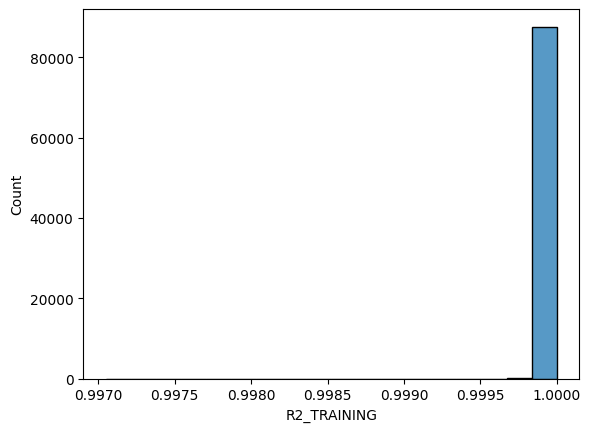

In [141]:
sns.histplot(data=overview_df,x="R2_TRAINING")

<Axes: xlabel='R2_TESTING', ylabel='Count'>

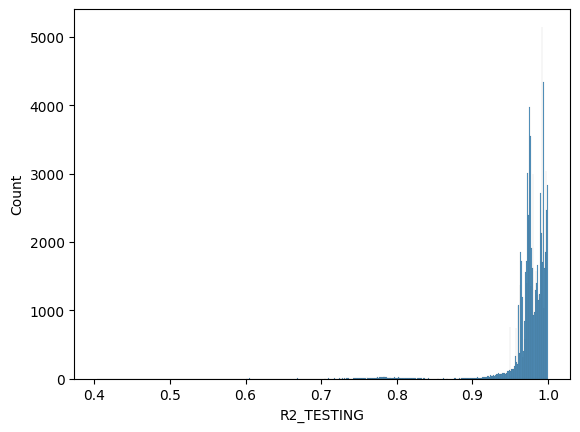

In [147]:
sns.histplot(data=overview_df.loc[(overview_df["R2_TESTING"] > 0.4)],x="R2_TESTING")

<Axes: xlabel='MAX_DEPTH', ylabel='R2_TESTING'>

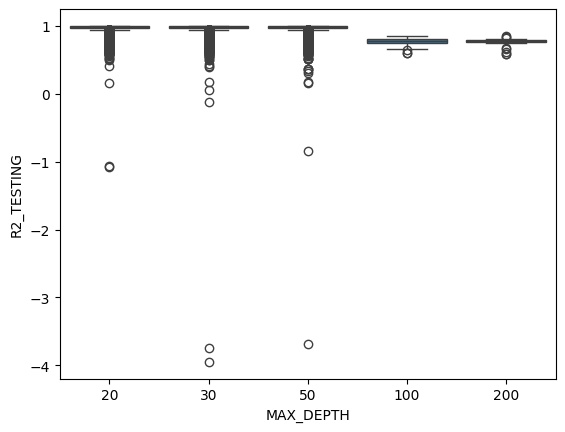

In [152]:
sns.boxplot(data=overview_df,x="MAX_DEPTH",y="R2_TESTING")

<Axes: xlabel='CRITERION', ylabel='R2_TESTING'>

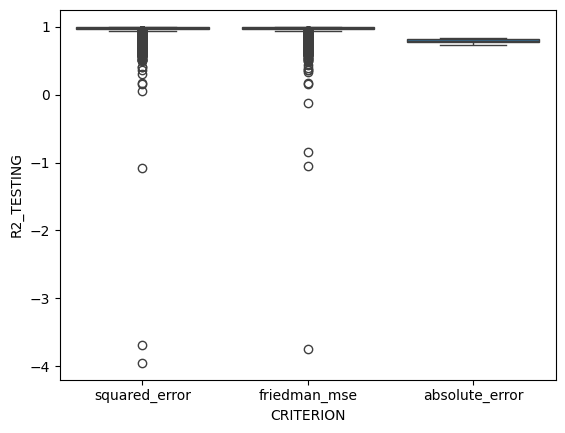

In [153]:
sns.boxplot(data=overview_df,x="CRITERION",y="R2_TESTING")

<Axes: xlabel='FEATURE_SELECTION', ylabel='R2_TESTING'>

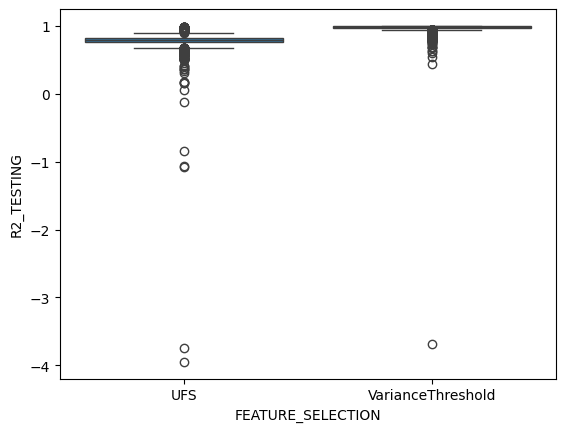

In [155]:
sns.boxplot(data=overview_df,x="FEATURE_SELECTION",y="R2_TESTING")